f1 = Texte ici ! // f2 = Black // f3 = black


Column
    [0] StaticText(align='center', value="<h3>Mon premier d...)
    [1] Row(align='center')
        [0] TextInput(name='Titre du graphique D..., value='Texte ici !')
        [1] RadioBoxGroup(inline=True, name='Couleur du graphique L..., options=['Black', 'Blue', ...], value='Black')
    [2] Row(align='center')
        [0] Select(name='Couleur du graphique S..., options=['black', 'orange', ...], value='black')
    [3] Row
        [0] ParamFunction(function)
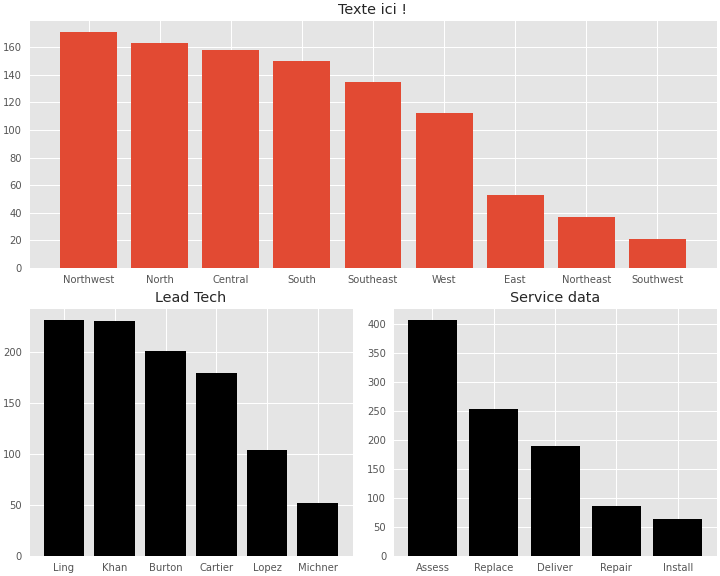

In [11]:
import pandas
import panel as pn
import panel.widgets as pnw
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

path = "./statics/sampledataworkorders.xlsx"
data = pandas.read_excel(path, sheet_name="WOs")

f1 = pnw.TextInput(name='Titre du graphique District', value="Texte ici !")
f2 = pnw.RadioBoxGroup(name='Couleur du graphique LeadTech', options=['Black', 'Blue', 'Yellow'], inline=True)
f3 = pnw.Select(name='Couleur du graphique Service ', options=['black', 'orange', 'white', 'blue', 'yellow'])

def create_figure(f1, f2, f3):
    with plt.style.context(("seaborn","ggplot")):
        fig = plt.figure(constrained_layout=True, figsize=(10,8))
        specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig) # Declaring 2x2 figure.

        ax1 = fig.add_subplot(specs[0, :]) # First Row
        ax2 = fig.add_subplot(specs[1, 0]) # Second Row First Column
        ax3 = fig.add_subplot(specs[1, 1]) # Second Row Second Colums

        # First graph
        district = data["District"]
        district_series = district.value_counts()
        district_index = district_series.index
        district_values = district_series.values
        # Put the values into the chart
        ax1.bar(district_index, district_values)
        ax1.set_title(f1)

        # Second graph
        lead_tech = data["LeadTech"]
        lead_tech_series = lead_tech.value_counts()
        lead_tech_index = lead_tech_series.index
        lead_tech_values = lead_tech_series.values
        # Put the values into the chart
        ax2.bar(lead_tech_index, lead_tech_values, color=f2)
        ax2.set_title("Lead Tech")

        # First graph
        service = data["Service"]
        service_series = service.value_counts()
        service_index = service_series.index
        service_values = service_series.values
        # Put the values into the chart
        ax3.bar(service_index, service_values, color=f3)
        ax3.set_title("Service data")

        plt.close(fig)
        return fig

@pn.depends(f1.param.value, f2.param.value, f3.param.value)
def create_dash(f1, f2, f3):
    print(f"f1 = {f1} // f2 = {f2} // f3 = {f3}")
    return create_figure(f1, f2, f3)

heading = "<h3>Mon premier dashboard interactif !</h3>\nSoyez indulgent c'est mon premier essai ..."
text = pnw.StaticText(value=heading, align="center")

dash3 = pn.Column(
    text,
    pn.Row(f1, f2, align="center"),
    pn.Row(f3, align="center"),
    pn.Row(create_dash)
)
dash3